# Pymaceuticals Inc.
---

### Analysis

- Total 249 mice were treated with drug for cancer treatment.

- Mice treated with Infubinol or Ceftamin regimen have slightly larger tumar volume compared to Capomulin or Ramicane.

- Capomulin and Ramicane is more effective based on final tumor volume.

- Drug's were less effetive o heavier mouse.


 

In [460]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [461]:
# Checking the number of mice.
number_of_mice = data_df["Mouse ID"].nunique()
print(f"The Number of mice is {number_of_mice}")


The Number of mice is 249


In [462]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
unique_ID = data_df.loc[data_df.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
unique_ID

array(['g989'], dtype=object)

In [464]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ID = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ID

array(['g989'], dtype=object)

In [465]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df[data_df['Mouse ID'].isin(duplicate_mouse_ID) == False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [466]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_df["Mouse ID"].nunique()
print(f"The Number of mice in clean dataframe is {number_of_mice}")

The Number of mice in clean dataframe is 248


## Summary Statistics

In [467]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
drug_mean

drug_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
drug_median

drug_variance = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
drug_variance

drug_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
drug_std

drug_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
drug_sem

# Assemble the resulting series into a single summary DataFrame.
single_summary_df = pd.DataFrame({"Mean": drug_mean, 
                                    "Median":drug_median, 
                                    "Variance":drug_variance, 
                                    "Std": drug_std, 
                                    "SEM": drug_sem})
single_summary_df


,Mean,Median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [468]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

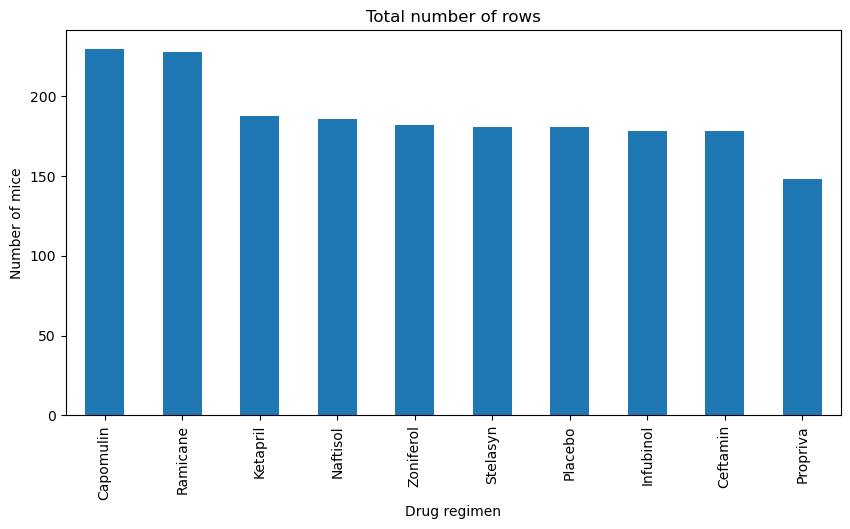

In [469]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.bar = clean_df["Drug Regimen"].value_counts().plot.bar(width=0.5, figsize=(10,5))

#set title & labels
plt.title("Total number of rows")
plt.xlabel("Drug regimen")
plt.ylabel("Number of mice")

plt.show()




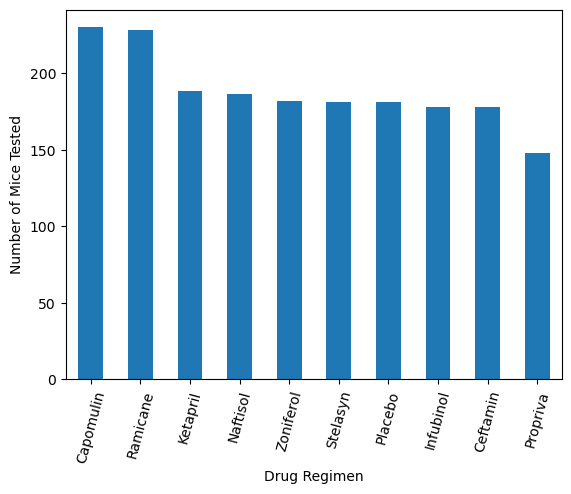

In [470]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = clean_df['Drug Regimen'].value_counts()
counts.plot(kind="bar")

#Set Title and Labels
plt.xlabel("Drug Regimen")
plt.xticks(rotation=75)
plt.ylabel("Number of Mice Tested")
plt.show()

Sex
Male      958
Female    922
Name: count, dtype: int64


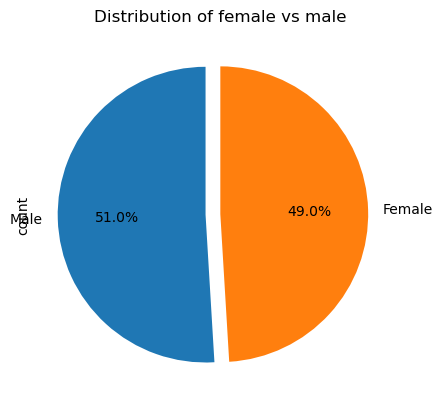

In [471]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_df["Sex"].value_counts()
print(sex_data)

#Plot a Pie chart
explode = (0.1, 0)
pie_plot = sex_data.plot.pie(explode=explode, autopct="%1.1f%%", startangle=90, title='Distribution of female vs male')


Sex
Male      958
Female    922
Name: count, dtype: int64


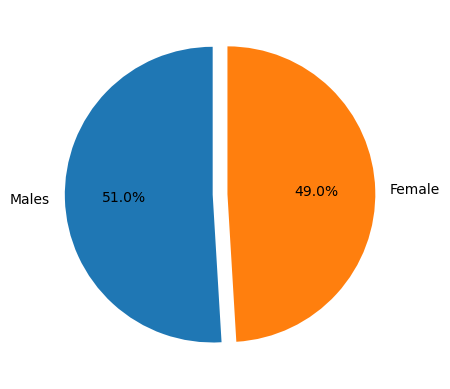

In [472]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = clean_df["Sex"].value_counts()
print(sex_data)
explode = (0.1, 0)
labels = "Males", "Female"
plt.pie(sex_data, labels=labels, explode=explode, autopct="%1.1f%%", startangle=90)

plt.show()

## Quartiles, Outliers and Boxplots

In [473]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
great_tp =  clean_df.groupby(["Mouse ID"])["Timepoint"].max()
great_tp = great_tp.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = great_tp.merge(clean_df,on=['Mouse ID','Timepoint'],how="left") 
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [474]:
great_tp
great_tp.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [475]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Cetamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
     # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol.append(tumor_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_data.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outlier_results = tumor_data.loc[(tumor_data < lower_bound) | (tumor_data > upper_bound)]
    print(f"{drug}'s potential outliers: {outlier_results}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Cetamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [476]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Cetamin"]
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Cetamin']

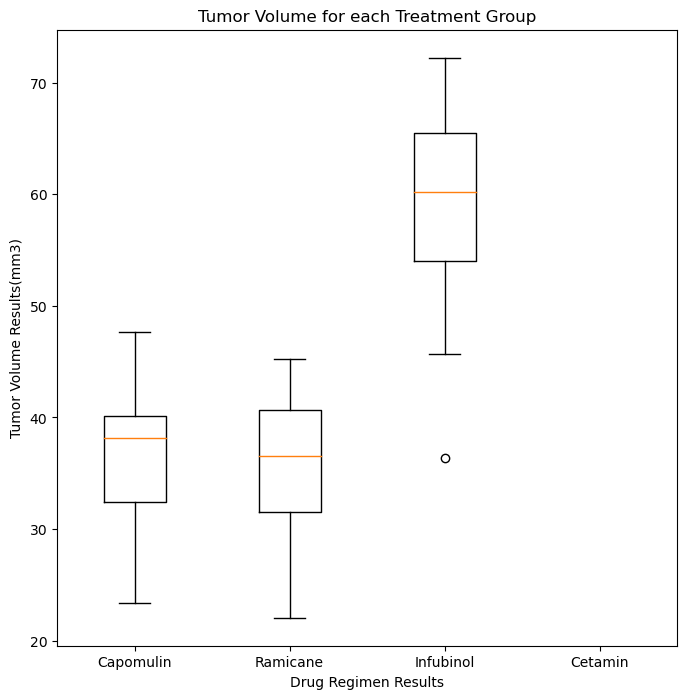

In [518]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.boxplot(tumor_vol, labels=treatments, widths = 0.4)
ax1.set_title("Tumor Volume for each Treatment Group")
ax1.set_xlabel("Drug Regimen Results")
ax1.set_ylabel("Tumor Volume Results(mm3)")
plt.savefig('boxplots')

plt.show()

In [478]:
single_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557"]
single_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
246,i557,0,45.000000,0,Capomulin,Female,1,24
365,i557,5,42.261665,0,Capomulin,Female,1,24
574,i557,10,42.992077,0,Capomulin,Female,1,24
860,i557,15,43.529876,0,Capomulin,Female,1,24
1052,i557,20,43.967895,0,Capomulin,Female,1,24
1157,i557,25,44.596219,0,Capomulin,Female,1,24
1309,i557,30,45.261384,0,Capomulin,Female,1,24
1573,i557,35,45.941949,0,Capomulin,Female,1,24
1712,i557,40,46.821070,1,Capomulin,Female,1,24
1878,i557,45,47.685963,1,Capomulin,Female,1,24


## Line and Scatter Plots

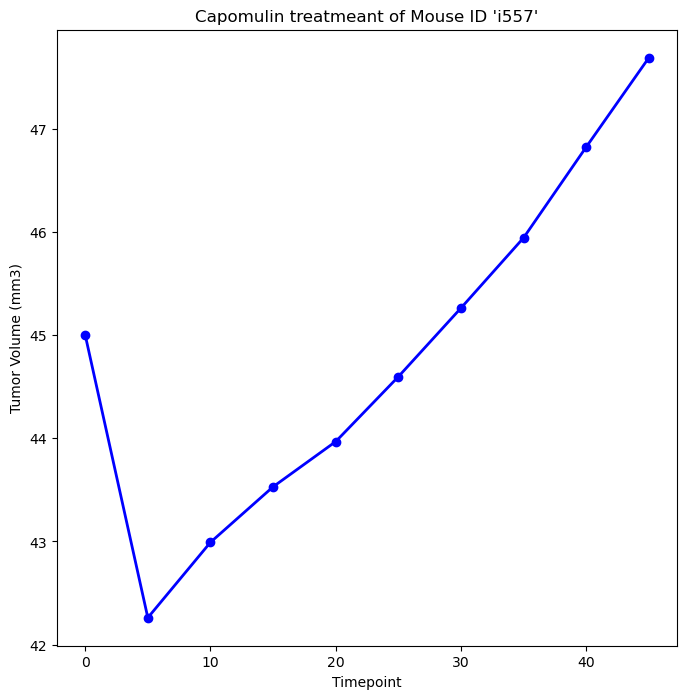

In [519]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_df


single_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "i557"]
single_mouse

#Line Plot
x_axis = single_mouse["Timepoint"]
tumor_volm = single_mouse["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(8,8))
plt.title("Capomulin treatmeant of Mouse ID 'i557'")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, tumor_volm,linewidth=2, marker="o",color="blue") 

plt.savefig('lineplots')

plt.show()

In [532]:
weight = capomulin_df["Weight (g)"].unique()
weight

array([22, 21, 17, 15, 23, 25, 20, 19, 24])

In [533]:
cap_reg_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_reg_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


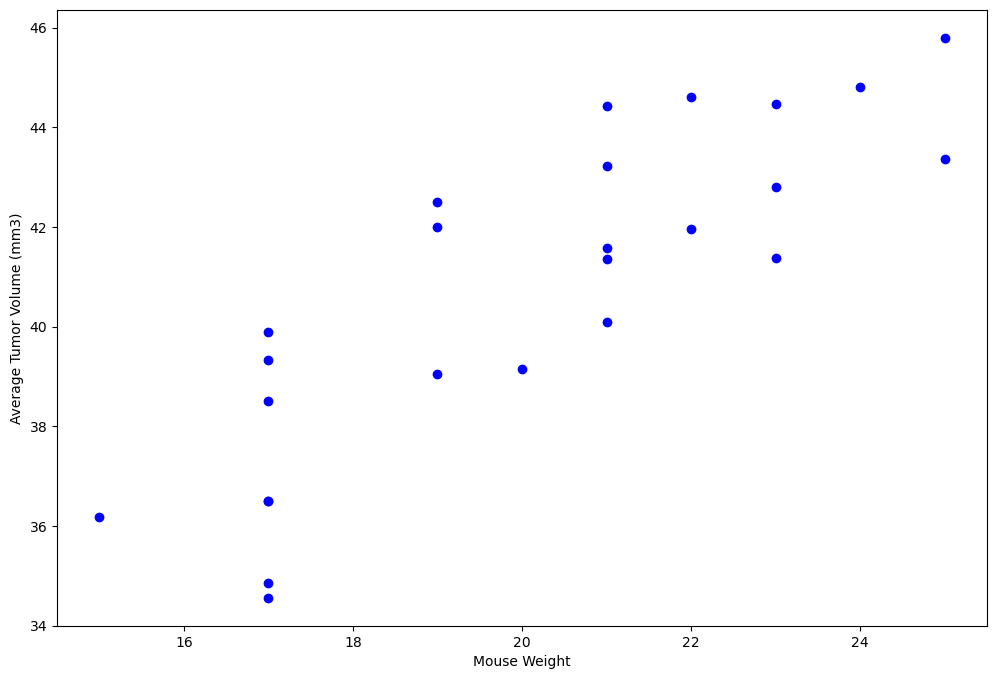

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0


In [534]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_reg_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
cap_reg_df

avgreg_df = cap_reg_df[['Mouse ID', 'Tumor Volume (mm3)', 'Weight (g)']].groupby(["Mouse ID"]).mean()
avgreg_df

#Scatter Plotav
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(avgreg_df["Weight (g)"],avgreg_df["Tumor Volume (mm3)"], color="blue")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume (mm3)")

plt.savefig('scatterplots')

plt.show()
avgreg_df.head()

## Correlation and Regression

In [528]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(avgreg_df["Weight (g)"],avgreg_df["Tumor Volume (mm3)"])[0],2)
print(f"The Correlation between mouse weight and average tumor volume is {correlation}")


The Correlation between mouse weight and average tumor volume is 0.84


In [536]:
#Linear Regression
correlation = st.pearsonr(weight, avgreg_df)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avgreg_df)
regress_values = weight * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, avgreg_df)
plt.plot(avgreg_df['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

ValueError: x and y must have the same length.